## `Import Statements`



In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import statsmodels

# plotly, matplotlib, seaborn, pandas

In [2]:
insurance = pd.read_csv('Data/insurance.csv')

In [4]:
pd.get_dummies(insurance["region"])

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


# Linear Regression Plots



In [29]:
fig = px.scatter(insurance, x='bmi', y='charges', opacity=0.65, trendline='ols', trendline_color_override='darkred')
fig.show()

In [32]:
fig = px.scatter(insurance, x='age', y='charges', opacity=0.65, trendline='ols', trendline_color_override='teal')
fig.show()

In [8]:
px.scatter(insurance,'smoker','charges')

In [11]:
px.scatter(insurance,'bmi','charges')

In [5]:
px.scatter(insurance,'bmi','charges',color = 'smoker')

In [37]:
px.imshow(pd.crosstab(insurance['children'],insurance['smoker']))

In [6]:
px.scatter(insurance, x="age", y="charges", color="sex")

In [7]:
px.bar(insurance, x="sex", y="charges")

In [9]:
px.bar(insurance, x="region", y="charges")

In [13]:
px.pie(insurance, values="smoker", names="region")

In [20]:
# import matplotlib.pyplot as plt

# plt.pie(insurance["region"], insurance["smoker"])

insurance.head()

#insurance.groupby("region")["bmi"].mean()

# Convert smoker from (Yes, No) --> (1, 0)
# groupby("...")["smoker"].mean()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
def convert_to_binary(sm):
    if sm == "yes":
        return 1
    elif sm == "no":
        return 0

insurance["binary_smoker"] = insurance["smoker"].apply(convert_to_binary)

insurance.groupby("region")["binary_smoker"].mean()

region
northeast    0.206790
northwest    0.178462
southeast    0.250000
southwest    0.178462
Name: binary_smoker, dtype: float64

In [16]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,binary_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [20]:
x = insurance[["region", "binary_smoker"]]
x = x[x["binary_smoker"] == 1]
x.head()

,region,binary_smoker
0,southwest,1
11,southeast,1
14,southeast,1
19,southwest,1
23,northeast,1


([<matplotlib.patches.Wedge at 0x7f60a3998b50>,
 [Text(0.7910790510561727, 0.7643258042092165, 'northeast'),
  Text(-0.6486028040891509, 0.8884336793074037, 'northwest'),
  Text(-0.7910790510561729, -0.7643258042092163, 'southeast'),
  Text(0.8656025814656391, -0.6787725472940269, 'southwest')])

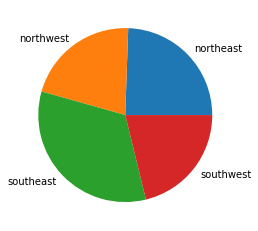

In [23]:
m = x.groupby("region").count()
import matplotlib.pyplot as plt 
plt.pie(m.binary_smoker, labels = m.index)

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: binary_smoker, Length: 1338, dtype: int64

In [7]:
fig = px.histogram(insurance, x="bmi", y="charges", color="age", marginal="rug")
fig.show()

In [0]:
# Can we make age a categorical variable?
# For example, 18 - 24 (Young), 25 - 40 (Adult), 40 - 55 (Middle Aged), 55+ (Senior)

In [0]:
def sexToBinary(sex):
    if sex == "male":
        return 1
    elif sex == "female":
        return 0

insurance["binary_sex"] = insurance["sex"].apply(sexToBinary)

In [0]:
insurance.drop("smoker", axis=1)
insurance.drop("sex", axis=1)

insurance.head()

In [0]:
px.scatter(insurance, x="binary_sex", y="charges")

In [9]:
px.scatter(insurance, x="age", y="charges", color="region")

In [4]:
px.scatter(insurance, x='bmi', y='charges')

In [5]:
px.scatter(insurance, x="age", y="charges")

In [6]:
px.scatter(insurance, x="children", y="charges")

In [10]:
px.histogram(insurance, x="children", y="charges")

In [14]:
px.pie(insurance,names="children")

In [4]:
def smokerToBinary(cond):
    if cond == "yes":
        return 1
    elif cond == "no":
        return 0

insurance["binary_smoker"] = insurance["smoker"].apply(smokerToBinary)

In [5]:
def sexToBinary(sex):
    if sex == "male":
        return 1
    elif sex == "female":
        return 0

insurance["binary_sex"] = insurance["sex"].apply(sexToBinary)

In [6]:
enc_region = pd.get_dummies(insurance["region"])
insurance_cleaned = pd.concat((insurance, enc_region), axis=1)

In [7]:
insurance_cleaned.drop("smoker", axis=1, inplace=True)
insurance_cleaned.drop("sex", axis=1, inplace=True)
insurance_cleaned.drop("region", axis=1, inplace=True)

<AxesSubplot:>

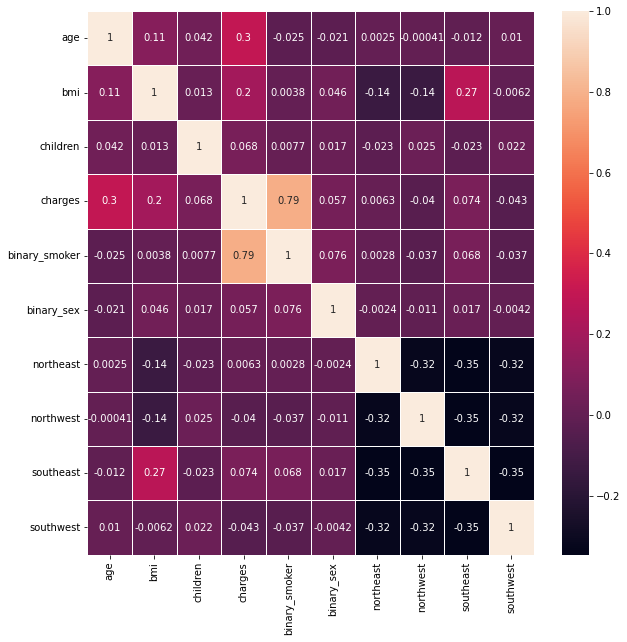

In [20]:
ax = plt.subplots(figsize=(10,10))
sns.heatmap(insurance_cleaned.corr(), annot=True, linewidths=.5)

In [23]:
px.pie(insurance_cleaned,values="charges",names="binary_smoker")

In [24]:
pie = px.pie(insurance_cleaned,names="binary_smoker")
pie.write_html( ??? )

In [27]:
px.pie(insurance_cleaned,values="charges",names="age")

In [32]:
px.violin(insurance_cleaned, x="binary_sex", y="charges", box=True, points='all')

In [33]:
px.violin(insurance_cleaned, y="charges", box=True, points='all')

In [37]:
px.violin(insurance_cleaned, x="binary_sex", y="charges", box=True, points='all')

In [38]:
px.violin(insurance_cleaned, x="binary_sex", y="charges", box=True, points='all', color="binary_smoker")

In [39]:
px.violin(insurance_cleaned, x="children", y="charges", box=True, points='all')

In [40]:
px.violin(insurance_cleaned, x="children", y="charges", box=True, points='all', color="binary_smoker")

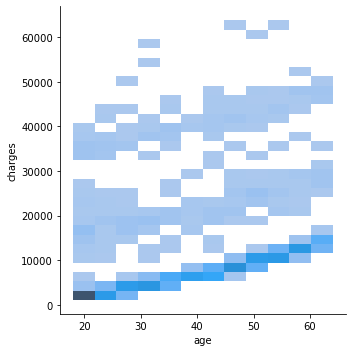

In [41]:
sns.displot(insurance_cleaned, x="age", y="charges") # pretty much the same as the scatter plot visually speaking

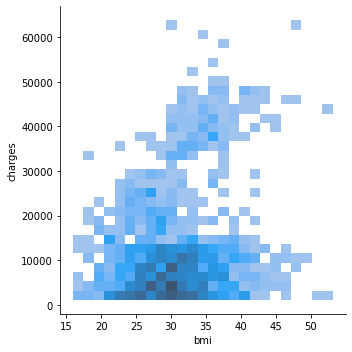

In [44]:
sns.displot(insurance_cleaned, x="bmi", y="charges")

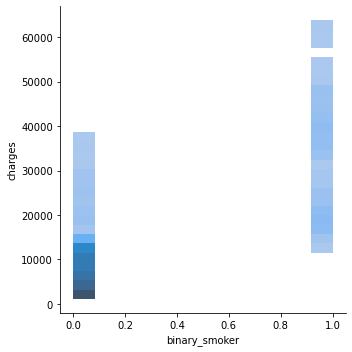

In [45]:
sns.displot(insurance_cleaned, x="binary_smoker", y="charges")

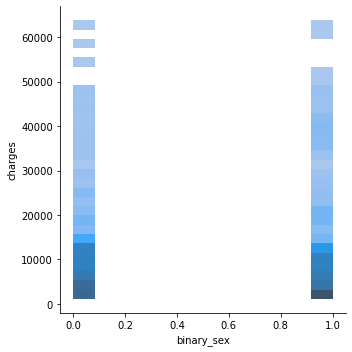

In [46]:
sns.displot(insurance_cleaned, x="binary_sex", y="charges")

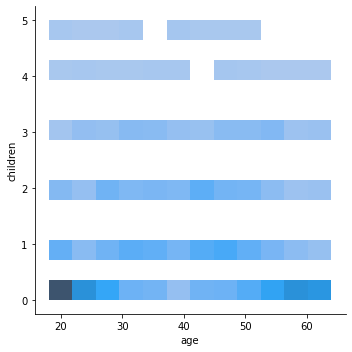

In [47]:
sns.displot(insurance_cleaned, x="age", y="children")

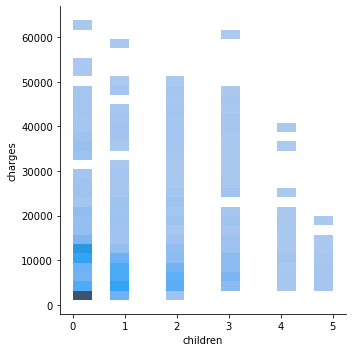

In [48]:
sns.displot(insurance_cleaned, x="children", y="charges")